In [1]:
import numpy as np
import pandas as pd
import plotnine as p9

In [2]:
results = pd.read_csv("results.csv")
metadata = pd.read_csv("visium_meta.csv")

In [4]:
# mean r2 and rmse, aggregate folds
results = results.groupby(['dataset_name', 'function_name']).mean().reset_index()

In [5]:
results = results.merge(metadata, left_on='dataset_name', right_on='slide_name', how='left')

In [24]:
# how many datasets per major_labl
results.groupby('major_labl').count()

,dataset_name,function_name,r2,rmse,slide_name,patient,patient_region_id,patient_group,batch,hca_sample_id
major_labl,,,,,,,,,,
BZ,18,18,18,18,18,18,18,18,18,18
CTRL,24,24,24,24,24,24,24,24,24,24
FZ,36,36,36,36,36,36,36,36,36,36
IZ,54,54,54,54,54,54,54,54,54,54
RZ,36,36,36,36,36,36,36,36,36,36


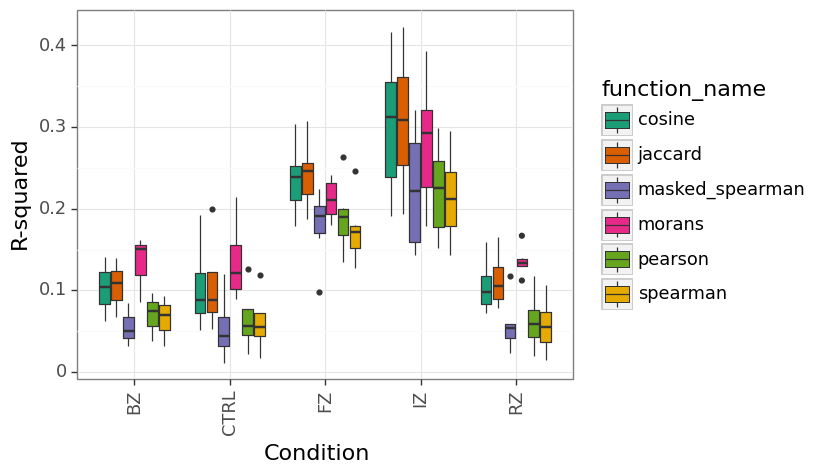

<ggplot: (8770791893272)>

In [48]:
# boxplot plot of r2 and rmse
(
        p9.ggplot(results, p9.aes(x='major_labl', y='r2', fill='function_name')) +
        p9.geom_boxplot() +
        p9.theme_bw(base_size=16) +
        p9.scale_fill_brewer(type='qual', palette='Dark2') +
        p9.theme(axis_text_x=p9.element_text(angle=90)) +
        p9.labs(x='Condition', y='R-squared')
        
)

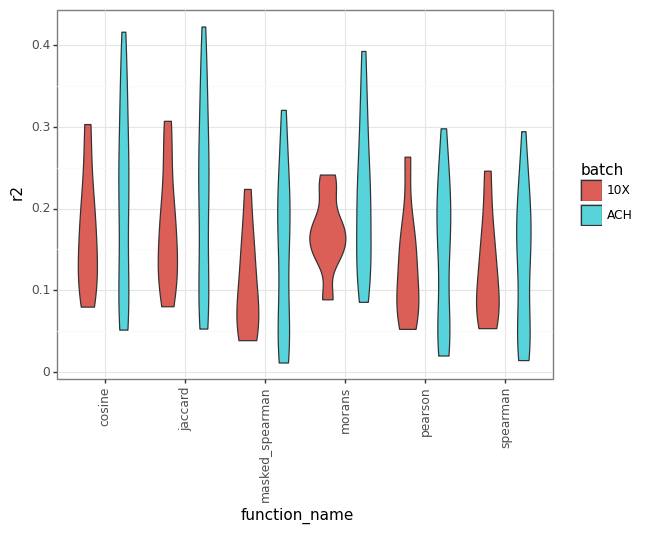

<ggplot: (8770789547552)>

In [40]:
# violion plot of r2 and rmse
(
        p9.ggplot(results, p9.aes(x='function_name', y='r2', fill='batch')) +
        p9.geom_violin() +
        p9.theme_bw() +
        p9.theme(axis_text_x=p9.element_text(angle=90))
        
)

In [8]:
## PCA
from sklearn.decomposition import PCA
pca = PCA()

In [7]:
performance_data = results.pivot(index='dataset_name', columns='function_name', values='r2')

In [9]:
pca.fit(performance_data)

PCA()

In [10]:
transformed_data = pca.transform(performance_data)

In [11]:
# Plot explained variance ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
df_variance = pd.DataFrame({"Components": range(1, len(explained_variance_ratio) + 1),
                            "Cumulative Explained Variance": explained_variance_ratio})



In [12]:
df = pd.DataFrame(transformed_data, columns= ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [13]:
df.index = performance_data.index

In [14]:
df = df.merge(metadata, left_index=True, right_on='slide_name', how='left')

In [15]:
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,slide_name,patient,patient_region_id,patient_group,major_labl,batch,hca_sample_id
0,-0.042369,-0.005848,0.025214,0.002132,-0.003664,-0.002212,AKK001_157785,P5,RZ/FZ_P5,group_1,FZ,10X,10X0027
1,0.092856,-0.015601,0.022527,0.007234,0.008959,-0.004007,AKK002_157779,P3,IZ_P3,group_2,IZ,10X,10X0017
2,-0.124540,-0.006714,0.004062,0.000106,0.000966,0.004668,AKK002_157781,P3,RZ/BZ_P3,group_1,BZ,10X,10X0026
3,-0.163309,0.000486,0.012689,0.006700,-0.000151,-0.004620,AKK002_157782,P3,RZ_P3,group_1,RZ,10X,10X0020
4,-0.002778,-0.029514,0.000202,-0.004504,0.002926,0.002781,AKK003_157775,P2,IZ/BZ_P2,group_2,IZ,10X,10X0018


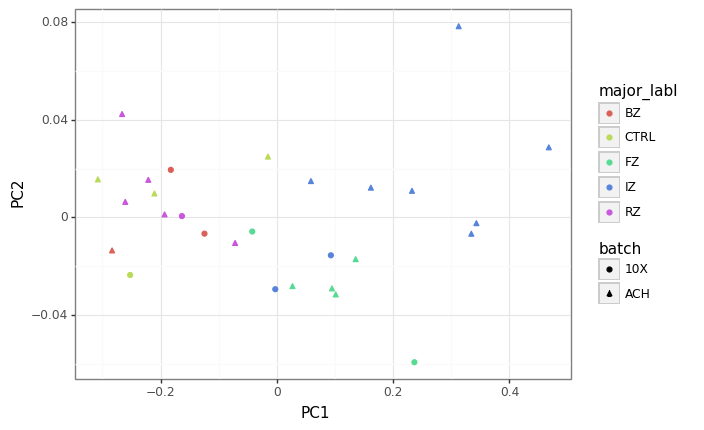

<ggplot: (8770796058495)>

In [16]:
# plot score with metadata labels
(
    p9.ggplot(df, p9.aes(x='PC1', y='PC2', color='major_labl', shape='batch')) +
    p9.geom_point() +
    p9.labs(x='PC1', y='PC2') +
    p9.theme_bw()
    
)